# ML model for Bioinformatics project - Drug Discovery

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("data/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv")

In [3]:
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.124939
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.301030
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.522879
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.096910


In [4]:
# Creating input features

In [5]:
X = df.drop('pIC50',axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4691,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4692,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4693,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
y = df.pIC50
y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64

In [8]:
# examine the data dimensions
X.shape

(4695, 881)

In [9]:
y.shape

(4695,)

In [10]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - 0.8)))
X = selection.fit_transform(X)

In [11]:
X.shape

(4695, 137)

In [12]:
# Data split (80/20 ratio)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [13]:
X_train.shape, y_train.shape

((3756, 137), (3756,))

In [14]:
X_test.shape, y_test.shape

((939, 137), (939,))

### Building a regression model using Random Forest

In [15]:
np.random.seed(42)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
r2 = model.score(X_test, y_test)
r2

0.5731298419261384

In [16]:
y_pred = model.predict(X_test)

### Scatter Plot Experimental vs Predicted pIC50 Values

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel("Experimental pIC50", fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize="large", fontweight="bold")
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show();

TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

## Comparing various ML libraries

In [20]:
#!pip install lazypredict

  Using cached lazypredict-0.2.12-py2.py3-none-any.whl (12 kB)
  Using cached xgboost-1.7.5-py3-none-win_amd64.whl (70.9 MB)
  Using cached lightgbm-3.3.5-py3-none-win_amd64.whl (1.0 MB)


In [21]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

### Data Pre-processing

In [22]:
X.shape

(4695, 137)

In [23]:
# Remove low various features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - 0.8)))
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y,
                                                   test_size=0.2)

### CompareML Algorithms

In [25]:
# clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
# train, test = clf.fit(X_train, X_test, y_train, y_test)

In [26]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [24:33<00:00, 35.09s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [23:51<00:00, 34.09s/it]


In [27]:
# Performance table of the training set (80%)
models_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.86,0.87,0.55,4.75
DecisionTreeRegressor,0.86,0.87,0.55,0.09
ExtraTreeRegressor,0.86,0.87,0.55,0.09
ExtraTreesRegressor,0.86,0.87,0.55,5.03
RandomForestRegressor,0.83,0.83,0.62,3.92
XGBRegressor,0.83,0.83,0.62,1.86
BaggingRegressor,0.81,0.82,0.65,0.55
MLPRegressor,0.80,0.81,0.67,5.03
HistGradientBoostingRegressor,0.68,0.69,0.85,3.12


In [28]:
# Performance table of the test set (20%)
models_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.44,0.52,1.12,2.96
XGBRegressor,0.44,0.52,1.12,0.83
LGBMRegressor,0.42,0.51,1.14,0.39
RandomForestRegressor,0.42,0.50,1.14,4.15
MLPRegressor,0.39,0.47,1.17,5.13
BaggingRegressor,0.38,0.47,1.17,0.44
NuSVR,0.38,0.47,1.18,1.19
SVR,0.37,0.46,1.19,1.94
KNeighborsRegressor,0.33,0.43,1.22,0.06


[(0.0, 1.0)]

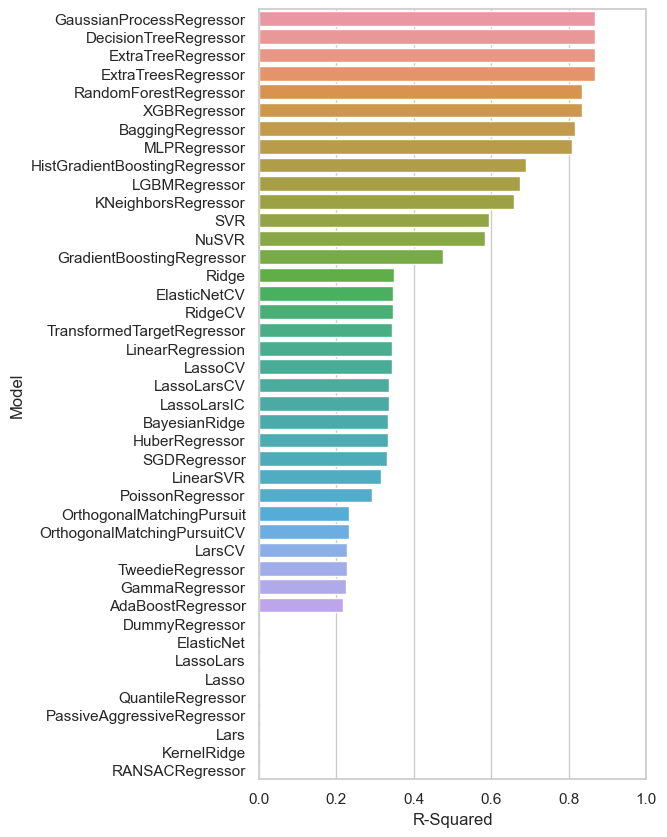

In [29]:
### Data Visualization of model performance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

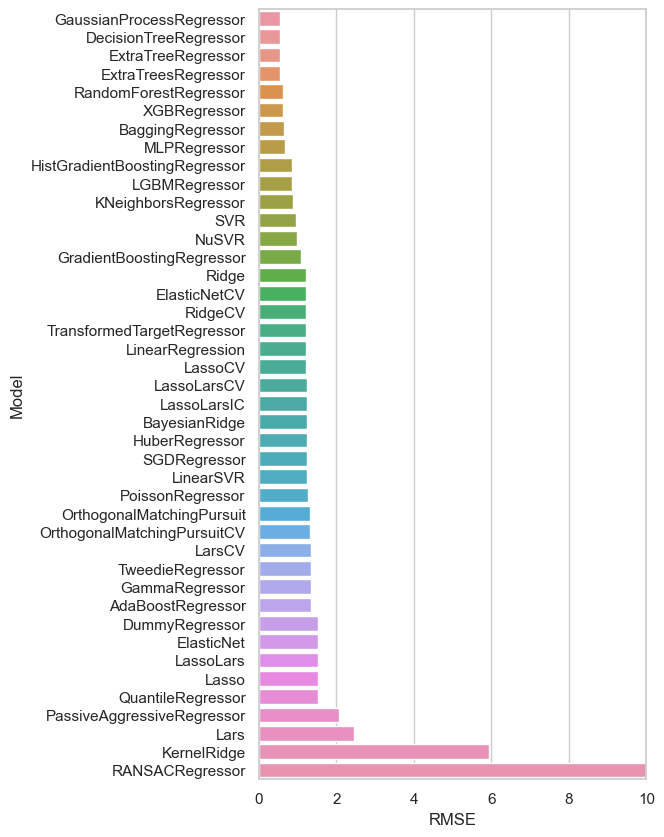

In [30]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

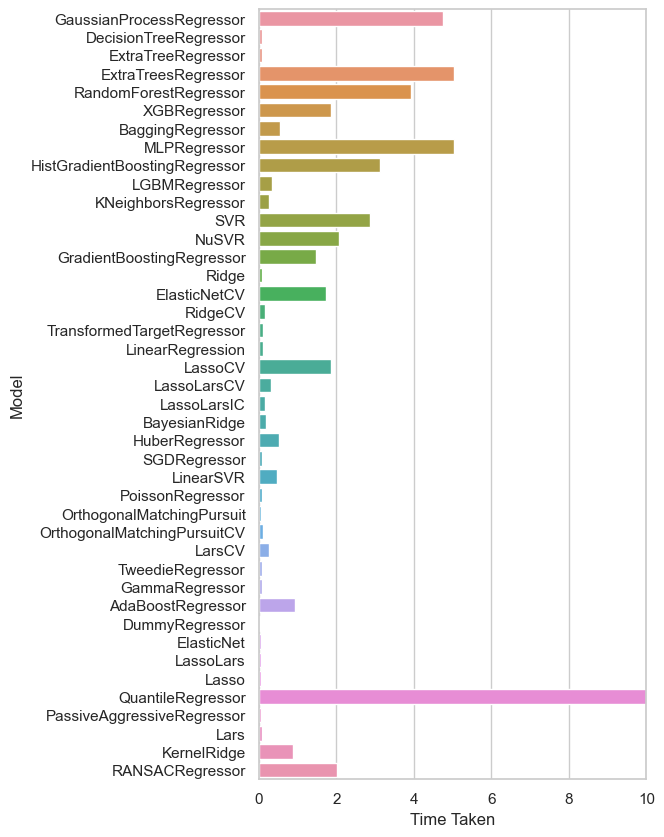

In [31]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))